### Ньяти Каелиле БВТ2201 - Лаб3 SLAM

### Accessing and Modifying pixel values

In [23]:
import numpy as np 
import cv2 as cv 

imag = cv.imread('image1.jpg')

# Resize the image to 500x500 pixels
img = cv.resize(imag, (500, 500))
assert img is not None, "file could not be read, check with os.path.exists()"

cv.imshow('Resized Image', img)
cv.waitKey(0)
cv.destroyAllWindows()

In [24]:
#BGR image (Blue, Green, and Red values)
px = img[100,100]
print(px)

[254 254 254]


In [25]:
#accessing only blue pixel
blue = img[100,100,0]
print(blue)

254


In [26]:
#Modifying pixel values
img[100,100] = [255,255,255]
print(img[100,100])

[255 255 255]


In [27]:
# accessing RED value
img.item(10,10,2)

254

In [28]:
# modifying RED value
img.itemset((10,10,2),100)
img.item(10,10,2)

100

### Accessing Image Properties

In [29]:
print("shape of image:",img.shape)
print("total no of pixels:", img.size )
print("Image datatype: ", img.dtype)

shape of image: (500, 500, 3)
total no of pixels: 750000
Image datatype:  uint8


### Image Region of Interest (ROI)

In [30]:
# Extract a region of size 60x30
country = img[360:420, 320:380]  # Shape: (60, 30, 3)

# Paste it into a destination region of the same size (60x30)
img[360:420, 100:160] = country  # Shape: (60, 30, 3)

# Display the resized image
cv.imshow('Resized Image', img)
cv.waitKey(0)
cv.destroyAllWindows()

### Splitting and Merging Image Channels

In [31]:
b,g,r = cv.split(img)
img = cv.merge((b,g,r))

# Display the resized image
cv.imshow('Resized Image', img)
cv.waitKey(0)
cv.destroyAllWindows()

In [32]:
b = img[:,:,0]

# Display the resized image
cv.imshow('Resized Image', img)
cv.waitKey(0)
cv.destroyAllWindows()

In [33]:
img[:,:,2] = 0
# Display the resized image
cv.imshow('Resized Image', img)
cv.waitKey(0)
cv.destroyAllWindows()

### Making Borders for Images (Padding)

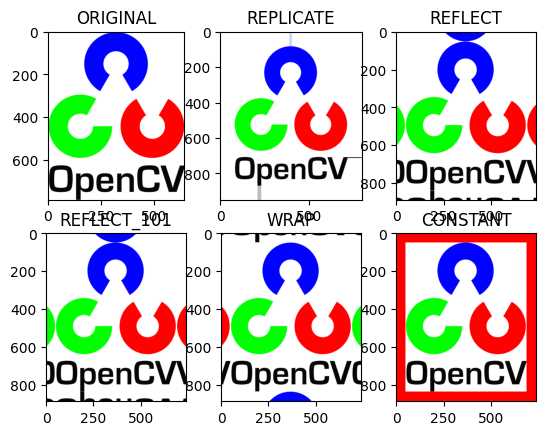

In [34]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
 
BLUE = [255,0,0]
 
# Read the image with alpha channel (if it exists)
img1 = cv.imread('opencv_orig.png', cv.IMREAD_UNCHANGED)

# Check if the image has an alpha channel
if img1.shape[2] == 4:
    # Split the image into color channels and alpha channel
    b, g, r, alpha = cv.split(img1)

    # Create a white background
    white_background = np.ones_like(img1[:, :, :3]) * 255

    # Normalize the alpha channel to range [0, 1]
    alpha = alpha.astype(float) / 255

    # Blend the image with the white background
    for channel in range(3):
        white_background[:, :, channel] = (
            white_background[:, :, channel] * (1 - alpha) + img1[:, :, channel] * alpha
        )

    # Convert back to uint8
    img1 = white_background.astype(np.uint8)
else:
    # If no alpha channel, assume the background is already white
    img1 = cv.imread('opencv_orig.png')
    
assert img1 is not None, "file could not be read, check with os.path.exists()"
 
replicate = cv.copyMakeBorder(img1,80,80,80,80,cv.BORDER_REPLICATE)
reflect = cv.copyMakeBorder(img1,50,50,50,50,cv.BORDER_REFLECT)
reflect101 = cv.copyMakeBorder(img1,50,50,50,50,cv.BORDER_REFLECT_101)
wrap = cv.copyMakeBorder(img1,50,50,50,50,cv.BORDER_WRAP)
constant= cv.copyMakeBorder(img1,50,50,50,50,cv.BORDER_CONSTANT,value=BLUE)
 
plt.subplot(231),plt.imshow(img1,'gray'),plt.title('ORIGINAL')
plt.subplot(232),plt.imshow(replicate,'gray'),plt.title('REPLICATE')
plt.subplot(233),plt.imshow(reflect,'gray'),plt.title('REFLECT')
plt.subplot(234),plt.imshow(reflect101,'gray'),plt.title('REFLECT_101')
plt.subplot(235),plt.imshow(wrap,'gray'),plt.title('WRAP')
plt.subplot(236),plt.imshow(constant,'gray'),plt.title('CONSTANT')
 
plt.show()

### Part Two

### Image Addition

In [35]:
x = np.uint8([250])
y = np.uint8([10])
 
print( cv.add(x,y) ) 
print( x+y )  

[[260.]
 [  0.]
 [  0.]
 [  0.]]
[4]


### Image Blending

In [ ]:
img1 = cv.imread('opencv_logo.png')
img2 = cv.imread('opencv_orig.png')
assert img1 is not None, "file could not be read, check with os.path.exists()"
assert img2 is not None, "file could not be read, check with os.path.exists()"
 
dst = cv.addWeighted(img1,0.7,img2,0.3,0)
 
cv.imshow('dst',dst)
cv.waitKey(0)
cv.destroyAllWindows()

error: OpenCV(4.11.0) D:\a\opencv-python\opencv-python\opencv\modules\core\src\arithm.cpp:665: error: (-209:Sizes of input arguments do not match) The operation is neither 'array op array' (where arrays have the same size and the same number of channels), nor 'array op scalar', nor 'scalar op array' in function 'cv::arithm_op'


### Bitwise Operation

In [37]:
# Load two images
img2 = cv.imread('opencv_logo1.png')
img1 = cv.imread('image1.jpg')
assert img1 is not None, "file could not be read, check with os.path.exists()"
assert img2 is not None, "file could not be read, check with os.path.exists()"
 
 # Resize both images to 800x500
img1 = cv.resize(img1, (800, 500))
img2 = cv.resize(img2, (800, 500))

rows,cols,channels = img2.shape
roi = img1[0:rows, 0:cols]
 
# create a mask of logo and create its inverse mask also
img2gray = cv.cvtColor(img2,cv.COLOR_BGR2GRAY)
ret, mask = cv.threshold(img2gray, 10, 255, cv.THRESH_BINARY)
mask_inv = cv.bitwise_not(mask)
 
# black-out the area of logo in ROI
img1_bg = cv.bitwise_and(roi,roi,mask = mask_inv)
 
# Take only region of logo from logo image.
img2_fg = cv.bitwise_and(img2,img2,mask = mask)
 
# Put logo in ROI and modify the main image
dst = cv.add(img1_bg,img2_fg)
img1[0:rows, 0:cols ] = dst
 
cv.imshow('res',img1)
cv.waitKey(0)
cv.destroyAllWindows()

##### Create a slide show of images in a folder with smooth transition between images using cv.addWeighted function

In [39]:
import cv2
import os
import time
import numpy as np

def load_images_from_folder(folder):
    images = []
    for filename in sorted(os.listdir(folder)):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, (500, 500))  # Resize image to 500x500
            images.append(img)
    return images

def smooth_transition(img1, img2, steps=30, delay=0.05):
    for alpha in np.linspace(0, 1, steps):
        blended = cv2.addWeighted(img1, 1 - alpha, img2, alpha, 0)
        cv2.imshow("Slideshow", blended)
        if cv2.waitKey(int(delay * 1000)) & 0xFF == 27:
            return False
    return True

def slideshow(folder, display_time=2, transition_steps=30):
    images = load_images_from_folder(folder)
    if not images:
        print("No images found in folder")
        return

    cv2.namedWindow("Slideshow", cv2.WINDOW_NORMAL)
    cv2.resizeWindow("Slideshow", 500, 500)  # Set window size to 500x500
    
    for i in range(len(images)):
        cv2.imshow("Slideshow", images[i])
        if cv2.waitKey(display_time * 1000) & 0xFF == 27:
            break
        next_image = images[(i + 1) % len(images)]
        if not smooth_transition(images[i], next_image, steps=transition_steps):
            break
    
    cv2.destroyAllWindows()

# Set the path to your folder
image_folder = "Pictures"
slideshow(image_folder)